In [1]:
from Advertiser import *
import datetime

In [2]:
LIME = '5a558391c3ebae42008b4567'
KONGA = '5a558967c3ebae43008b4567'

In [3]:
lime = Advertiser(adv_id=LIME)
konga = Advertiser(adv_id=KONGA)

In [4]:
start_date = '2021-01-04'
end_date = str(datetime.date.today())

In [5]:
# доступные параметры для index: date, week, month, year
lime = lime.general_stats(date_from=start_date, date_to=end_date, index='week')

In [6]:
'''
reg - registrations
new - new loans
old - repeated loans
all - all loans (new + old)
ARn% - approve rate reg->new
ARo% - approve rate reg->old
RLS% - repeated loans share 
'''
lime

loan_category,reg,new,old,all,ARn%,ARo%,RLS%
week,,,,,,,
1,7706,1960,676,2636,25.43,8.77,25.64
2,6431,1630,692,2322,25.35,10.76,29.80
3,8517,1912,756,2668,22.45,8.88,28.34
4,8926,1947,696,2643,21.81,7.80,26.33
5,8733,1945,680,2625,22.27,7.79,25.90
6,7443,1602,762,2364,21.52,10.24,32.23
7,7763,1699,787,2486,21.89,10.14,31.66
8,9342,1996,968,2964,21.37,10.36,32.66
9,9952,2327,932,3259,23.38,9.36,28.60


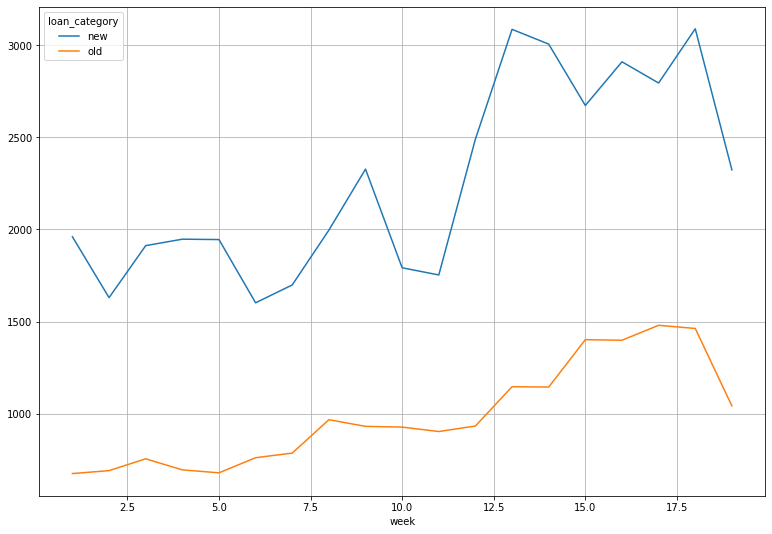

In [7]:
lime[['new', 'old']].plot(figsize=(13,9), grid=True);

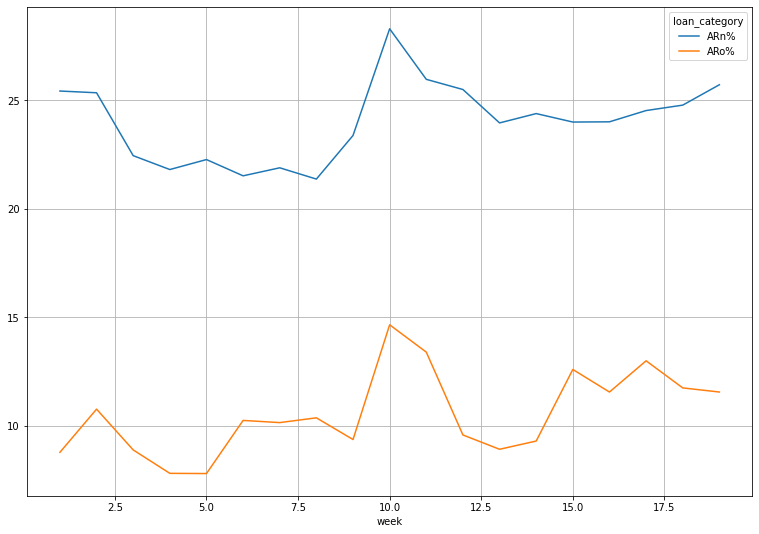

In [8]:
lime[['ARn%', 'ARo%']].plot(figsize=(13,9), grid=True);

In [ ]:
`